In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import t

In [ ]:
## Figure 1 ------------------
## 1. Fig 1b ---

MSE: 0.02
R^2: 0.54
0.6988640446390124
Feature: mod_rate, Score: 0.48063
Feature: length, Score: 0.06605
Feature: depth, Score: 0.05409
Feature: similarity, Score: -0.10551
Feature: fpr, Score: -0.16324


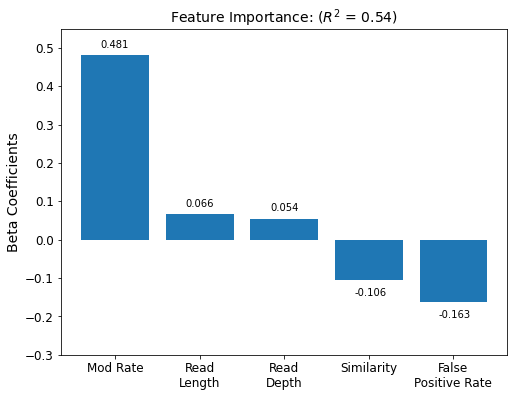

In [17]:
# linear regression feature importance

f_evaluation = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/evaluation_all_bmm_v2.txt"

df = pd.read_csv(f_evaluation,
                 names=["simulation", "method", "length", "depth", "mod_rate", 
                        "freq_code", "similarity", "cluster", "rep", "fpr", "acc", "fms", "ari", "ami"])

features = ["mod_rate", "length", "depth", "similarity", "fpr"]
features_labels = ["Mod Rate", "Read\nLength", "Read\nDepth", "Similarity", "False\nPositive Rate"]

X = df.loc[:,features]
y = df.acc

min_max_scaler = MinMaxScaler().fit(X)
X_norm = min_max_scaler.transform(X)

model = LinearRegression()
model.fit(X_norm, y)

y_pred = model.predict(X_norm)
print('MSE: %.2f' % mean_squared_error(y, y_pred))
print('R^2: %.2f' % r2_score(y, y_pred))
print(model.intercept_)

importance = model.coef_
# summarize feature importance
for feature, v in zip(features, importance):
	print('Feature: %s, Score: %.5f' % (feature, v))
     
# plot feature importance
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(range(5))
ax.set_xticklabels(features_labels)
ax.set_ylabel("Beta Coefficients", fontsize=14)
ax.set_title("Feature Importance: ($R^2$ = %.2f)" % r2_score(y, y_pred), fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

for i in range(3):
    ax.annotate("%.3f" % importance[i], xy=(i-0.17, importance[i]+0.02))

for i in (3, 4):
    ax.annotate("%.3f" % importance[i], xy=(i-0.17, importance[i]-0.04))

ax.set_ylim(-0.3, 0.55)

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/'
fig.savefig(dir_out+'Fig1b_synthetic_simulation_feature_importance.pdf',bbox_inches='tight')

In [ ]:
### to calculate the P value for each features  

In [18]:
# use scikit-learn's linear regression model to obtain the coefficient estimates

reg = LinearRegression().fit(X, y)
beta_hat = [reg.intercept_] + reg.coef_.tolist()
beta_hat

# compute the p-values
# add ones column

n=4968
X1 = np.column_stack((np.ones(n), X))

# standard deviation of the noise.
sigma_hat = np.sqrt(np.sum(np.square(y - X1@beta_hat)) / (n - X1.shape[1]))

# estimate the covariance matrix for beta 
beta_cov = np.linalg.inv(X1.T@X1)

# the t-test statistic for each variable from the formula from above figure
t_vals = beta_hat / (sigma_hat * np.sqrt(np.diagonal(beta_cov)))

# compute 2-sided p-values.
p_vals = t.sf(np.abs(t_vals), n-X1.shape[1])*2 
print(t_vals)
print(p_vals)

[ 72.45854019  70.415428    12.38586065  11.04128847 -21.71432628
 -26.01816768]
[0.00000000e+000 0.00000000e+000 1.01144969e-034 5.10756323e-028
 5.93405698e-100 5.20352565e-140]


In [ ]:
## Supp_Fig 1a ---

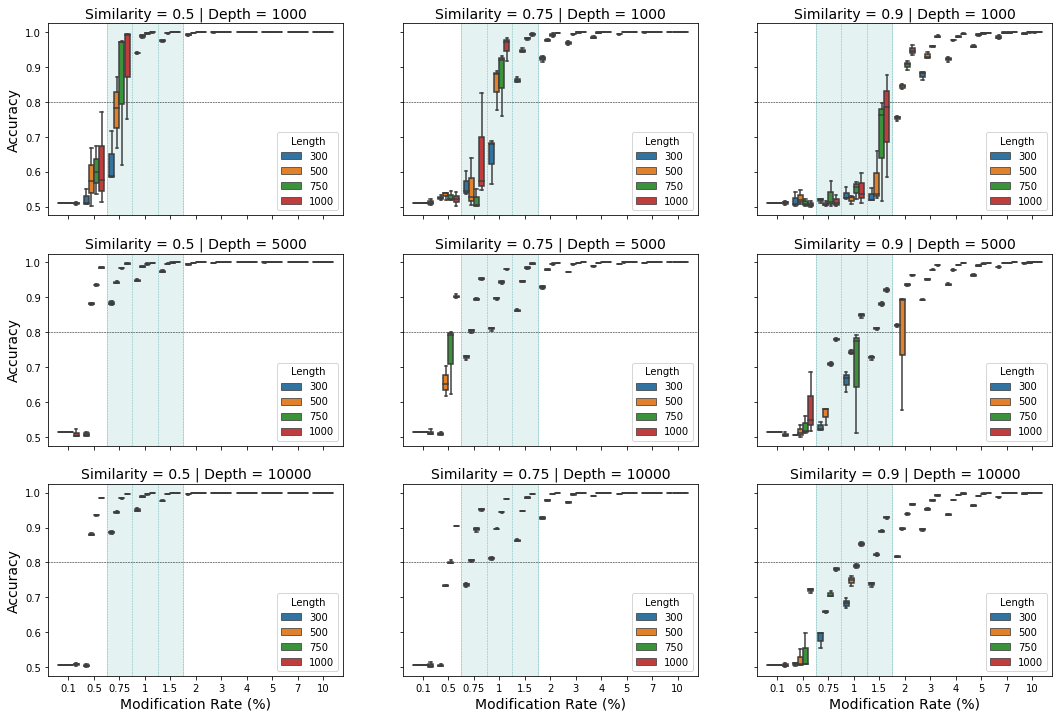

In [3]:
f_evaluation = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/evaluation_all_bmm.txt"

df = pd.read_csv(f_evaluation,
                 names=["simulation", "method", "length", "depth", "mod_rate", 
                        "freq_code", "similarity", "cluster", "rep", "fpr", "acc", "fms", "ari", "ami"])


fig, ax = plt.subplots(3, 3, figsize=(18, 12), sharex=True, sharey=True)

for j, similarity in enumerate([0.5, 0.75, 0.9]):
    for no, depth in enumerate([1000, 5000, 10000]):

        df_subset = df[(df.depth == depth) & (df.similarity == similarity)] # & (df.mod_rate.isin([0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.1]))]
        sns.boxplot(data=df_subset, x="mod_rate", y="acc", hue="length", ax=ax[no,j])
        
        ax[no,j].set_xlabel("")
        ax[no,j].set_ylabel("")
        ax[no,j].set_title("Similarity = %s | Depth = %s" % (similarity, depth), fontsize=14)
        ax[no,j].legend(loc="lower right", fontsize="medium", title="Length")
        ax[no,j].axhline(0.8, linewidth=0.5, linestyle="--", color="black", zorder=-10)

        ax[no,j].axvspan(1.5, 4.5, color="teal", alpha=0.1, zorder=-10)
        for xline in (1.5, 2.5, 3.5, 4.5):
            ax[no,j].axvline(xline, color="teal", alpha=0.5, zorder=-10, linewidth=0.5, linestyle="--")

for i in range(3):
    ax[i,0].set_ylabel("Accuracy", fontsize=14)
    #ax[i,0].tick_params(labelsize=12)
    
for i in range(3):
    ax[-1,i].set_xlabel("Modification Rate (%)", fontsize=14)
    ax[-1,i].set_xticks(range(11))
    ax[-1,i].set_xticklabels(["0.1", "0.5", "0.75", "1", "1.5", "2", "3", "4", "5", "7", "10"])

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/'
fig.savefig(dir_out+'Supp_Fig1a_synthetic_simulation_diff_simi_depth_length.pdf',bbox_inches='tight')

In [ ]:
## Supp_Fig 1b ---

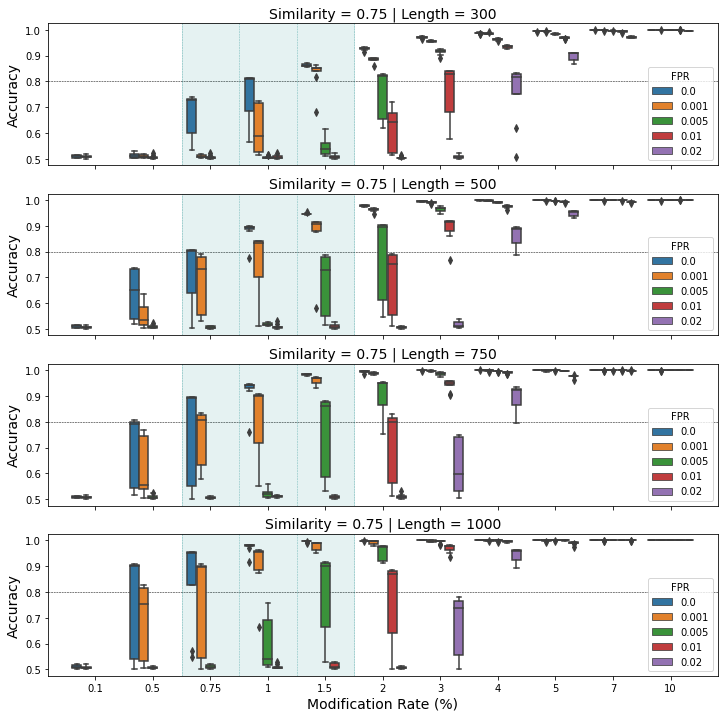

In [4]:
f_evaluation = "/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/evaluation_all_bmm_v2.txt"

df = pd.read_csv(f_evaluation,
                 names=["simulation", "method", "length", "depth", "mod_rate", 
                        "freq_code", "similarity", "cluster", "rep", "fpr", "acc", "fms", "ari", "ami"])


fig, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True, sharey=True)

for j, length in enumerate([300, 500, 750, 1000]):

    df_subset = df[(df.similarity == 0.75) & (df.length == length)] # & (df.mod_rate.isin([0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.1]))]
    sns.boxplot(data=df_subset, x="mod_rate", y="acc", hue="fpr", ax=ax[j])
    
    ax[j].set_xlabel("")
    ax[j].set_ylabel("")
    ax[j].set_title("Similarity = %s | Length = %s" % (0.75, length), fontsize=14)
    ax[j].legend(loc="lower right", fontsize="medium", title="FPR")
    ax[j].axhline(0.8, linewidth=0.5, linestyle="--", color="black", zorder=-10)

    ax[j].axvspan(1.5, 4.5, color="teal", alpha=0.1, zorder=-10)
    for xline in (1.5, 2.5, 3.5, 4.5):
        ax[j].axvline(xline, color="teal", alpha=0.5, zorder=-10, linewidth=0.5, linestyle="--")

for i in range(4):
    ax[i].set_ylabel("Accuracy", fontsize=14)
    #ax[i,0].tick_params(labelsize=12)

for i in range(4):
    ax[-1].set_xlabel("Modification Rate (%)", fontsize=14)
    ax[-1].set_xticks(range(11))
    ax[-1].set_xticklabels(["0.1", "0.5", "0.75", "1", "1.5", "2", "3", "4", "5", "7", "10"])

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure1/Data/'
fig.savefig(dir_out+'Supp_Fig1b_synthetic_simulation_with_FPR.pdf',bbox_inches='tight')